### Importing Libraries

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [216]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from scipy.stats import ks_2samp, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import randint 
import warnings
warnings.filterwarnings('ignore')

### Importing Data 

In [217]:
import os
os.getcwd()
os.chdir('/Users/hridul.gupta/Desktop/Maverick AI Repo/workbench/datasets/')
os.getcwd()

'/Users/hridul.gupta/Desktop/Maverick AI Repo/workbench/datasets'

In [218]:
# import data
data = pd.read_csv("LendingClub_NewDataSet_4.csv")
print(data.shape)

(1426331, 40)


### Data Exploration

In [219]:
data.head()

Unnamed: 0  funded_amnt        term  int_rate sub_grade emp_length  \
0           1        12000   36 months     10.72        B2    7 years   
1           3        25000   36 months     23.40        E1  10+ years   
2           4        18000   36 months      8.81        A5    3 years   
3           6        10000   60 months     17.97        D1    2 years   
4           8        10000   60 months     19.92        D3  10+ years   

  home_ownership  delinq_2yrs  out_prncp  total_pymnt  ...  \
0           RENT          0.0   11822.02       338.78  ...   
1       MORTGAGE          0.0   24725.78       940.47  ...   
2           RENT          0.0   17561.34       544.38  ...   
3           RENT          0.0    9895.97       233.78  ...   
4           RENT          0.0    9901.50       253.43  ...   

   num_stats_per_open_acc ratio_of_cred_balnc_gt_0_to_cred_accnts  \
0                     1.0                                     1.0   
1                     1.0                                     1.0   
2                     1.0                                     1.0   
3                     1.0                                     1.0   
4                     1.0                                     1.0   

   open_to_total_Acc  satisfactory_bnk_crd_accs_to_total_accnt  \
0           0.793103                                    0.9375   
1           0.576923                                    0.7000   
2           0.526316                                    0.5000   
3           0.545455                                    0.7500   
4           0.545455                                    1.0000   

   interest_ration_to_princi_amt  Intrst_rcvd_tl_dt  \
0                       3.260667         338.254644   
1                       3.891880         940.178422   
2                       3.171167         543.574203   
3                       2.537800         233.335009   
4                       2.645000         253.041333   

   tot_instl_accnt_+_tot_bal_exc_mort  Earliest_cr_line_month  \
0                             54939.0              259.093616   
1                             27402.0              153.103760   
2                             35121.0              189.112713   
3                            110424.0              109.143925   
4                             34441.0              160.068995   

   last_credit_pull_d_month  total_revol_util  
0                  4.074006              16.7  
1                  4.074006              38.0  
2                  4.074006               6.0  
3                  4.074006              63.5  
4                  4.074006              50.4  

[5 rows x 40 columns]

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426331 entries, 0 to 1426330
Data columns (total 40 columns):
Unnamed: 0                                  1426331 non-null int64
funded_amnt                                 1426331 non-null int64
term                                        1426331 non-null object
int_rate                                    1426331 non-null float64
sub_grade                                   1426331 non-null object
emp_length                                  1426331 non-null object
home_ownership                              1426331 non-null object
delinq_2yrs                                 1426331 non-null float64
out_prncp                                   1426331 non-null float64
total_pymnt                                 1426331 non-null float64
last_pymnt_amnt                             1426331 non-null float64
application_type                            1426331 non-null object
annual_inc_joint                            1426331 non-null float64

In [221]:
data['Response'].value_counts(normalize=True)

1    0.868744
0    0.131256
Name: Response, dtype: float64

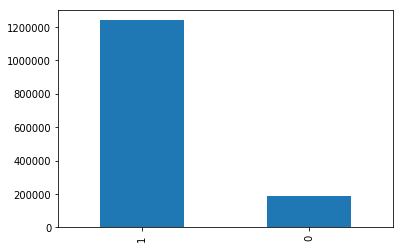

In [222]:
data['Response'].value_counts().plot.bar()

In [223]:
# feature : term
data.term = data.term.str.replace('months','').astype(np.int)

In [224]:
data.shape

(1426331, 40)

In [225]:
data = data.drop(['emp_length'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)

In [226]:
list(data.columns)

['funded_amnt',
 'term',
 'int_rate',
 'sub_grade',
 'home_ownership',
 'delinq_2yrs',
 'out_prncp',
 'total_pymnt',
 'last_pymnt_amnt',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'il_util',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'bc_util',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_actv_bc_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_tl_op_past_12m',
 'revol_bal_joint',
 'Response',
 'num_stats_per_open_acc',
 'ratio_of_cred_balnc_gt_0_to_cred_accnts',
 'open_to_total_Acc',
 'satisfactory_bnk_crd_accs_to_total_accnt',
 'interest_ration_to_princi_amt',
 'Intrst_rcvd_tl_dt',
 'tot_instl_accnt_+_tot_bal_exc_mort',
 'Earliest_cr_line_month',
 'last_credit_pull_d_month',
 'total_revol_util']

### Label encoding

In [227]:
str_cols = data.select_dtypes(include=['object']).columns
str_cols

Index(['sub_grade', 'home_ownership', 'application_type'], dtype='object')

In [228]:
#### Preprocessing using label encoder for string columns

from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()

for str_col_nm in str_cols:
   print(str_col_nm)
   data[str_col_nm].fillna("No information available", inplace = True)
   label_encode.fit(data[str_col_nm])
   data[str_col_nm] = label_encode.transform(data[str_col_nm])



sub_grade
home_ownership
application_type


### Sampling data to reduce computation time

In [229]:
data = data.sample(50000)

In [230]:
data['Response'].value_counts(normalize=True)

1    0.87014
0    0.12986
Name: Response, dtype: float64

In [231]:
data['Response'].value_counts()

1    43507
0     6493
Name: Response, dtype: int64

### Data preparation for Modeling

In [232]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import OneSidedSelection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [234]:
# Splitting the data
y = data['Response']
X = data.drop(['Response'], axis=1)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
def evaluation(model, X_train, X_test):
    
    Y_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)
    Y_prob = model.predict_proba(X_test)[:,1]
    Y_train_prob = model.predict_proba(X_train)[:,1]

    print("--- ROC AUC ---")
    print("Training Set:", roc_auc_score(y_train, Y_train_prob))
    print("Test Set:", roc_auc_score(y_test, Y_prob))
    
    print("\n--- Accuracy ---")
    print("Training Set:", model.score(X_train, y_train))
    print("Test Set:", model.score(X_test, y_test))

    tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
    print("\n--- Confusion Matrix ---")
    print("True Positive:", tp)
    print("False Negative:", fn)
    print("True Negative:", tn)
    print("False Positive:", fp)

    print("\n--- Precision ---")
    print("Training Set:", precision_score(y_train, Y_train_pred))
    print("Test Set:", precision_score(y_test, Y_pred))

    print("\n--- Recall ---")
    print("Training Set:", recall_score(y_train, Y_train_pred))
    print("Test Set:", recall_score(y_test, Y_pred))

    print("\n--- F1 Score ---")
    print("Training Set:", f1_score(y_train, Y_train_pred))
    print("Test Set:", f1_score(y_test, Y_pred))
    
    
def plot_ROC(model, X_test):
    
    Y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = roc_curve(y_test, Y_prob, pos_label=1)
    roc_auc = roc_auc_score(y_test, Y_prob)
    fig = plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2)
    plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Area = {:.2f})'.format(roc_auc))
    plt.legend(loc="lower right")
    plt.show()

# Effect of Hyperpartameters

### First Random Forest Model

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [241]:
rf_clf1 = RandomForestClassifier(n_estimators=50, random_state=0, max_features=2, max_depth = 10, verbose=2, n_jobs=-1)
rf_clf1.fit(X_train, y_train)

building tree 1 of 50building tree 2 of 50

building tree 3 of 50building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50building tree 30 of 50
building tree 31 of 50

building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.8s



building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=0, verbose=2, warm_start=False)

In [239]:
evaluation(rf_clf1, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9814071765538311
Test Set: 0.944840161906287

--- Accuracy ---
Training Set: 0.91245
Test Set: 0.8981

--- Confusion Matrix ---
True Positive: 8657
False Negative: 4
True Negative: 324
False Positive: 1015

--- Precision ---
Training Set: 0.9087636932707355
Test Set: 0.8950578990901572

--- Recall ---
Training Set: 0.9998852092062217
Test Set: 0.99953815956587

--- F1 Score ---
Training Set: 0.9521493181756074
Test Set: 0.9444171712212951


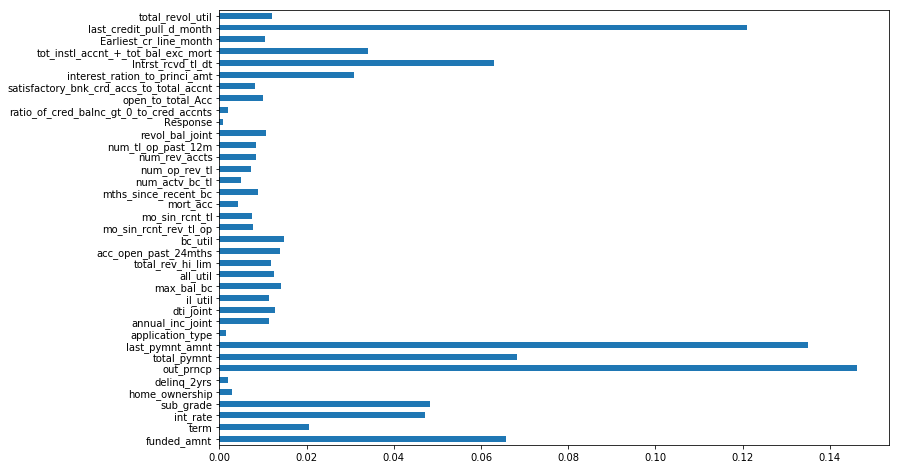

In [147]:
features = list(data.columns)
del features[28]

importances=pd.Series(rf_clf1.feature_importances_, index=features)
importances.plot(kind='barh', figsize=(12,8))

### Second Random Forest Model

In [242]:
rf_clf2 = RandomForestClassifier(n_estimators=100, random_state=0, max_features=4, max_depth = 5)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [243]:
evaluation(rf_clf2, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9459530576924409
Test Set: 0.9385426278462015

--- Accuracy ---
Training Set: 0.890425
Test Set: 0.8869

--- Confusion Matrix ---
True Positive: 8661
False Negative: 0
True Negative: 208
False Positive: 1131

--- Precision ---
Training Set: 0.8882714318488873
Test Set: 0.8844975490196079

--- Recall ---
Training Set: 1.0
Test Set: 1.0

--- F1 Score ---
Training Set: 0.9408302396220047
Test Set: 0.9387091529832547


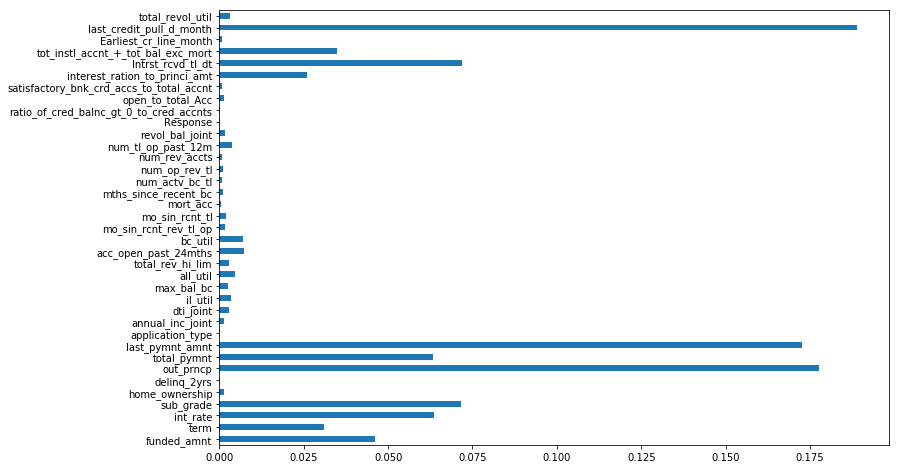

In [150]:
importances=pd.Series(rf_clf2.feature_importances_, index=features)
importances.plot(kind='barh', figsize=(12,8))

# Grid Search

In [244]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

# Specify parameters and distributions to sample from
parameters = {
    "max_features": [2,4],
    "min_samples_split": [2,5],
    "max_depth": range(5,7),
    "n_estimators" : [50]
}

# Run Grid Search
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring ='roc_auc',
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(grid_search.cv_results_)

In [245]:
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.021074      0.020692         0.099712        0.005314   
1       1.645820      0.181157         0.142699        0.014774   
2       2.879077      0.051164         0.203058        0.098528   
3       3.080914      0.093268         0.176762        0.076065   
4       2.270198      0.124056         0.174995        0.003954   
5       2.183583      0.255350         0.133345        0.033039   
6       3.305979      0.045859         0.133250        0.016246   
7       2.566575      0.537345         0.082935        0.023674   

  param_max_depth param_max_features param_min_samples_split  \
0               5                  2                       2   
1               5                  2                       5   
2               5                  4                       2   
3               5                  4                       5   
4               6                  2                       2   
5               6                  2                       5   
6               6                  4                       2   
7               6                  4                       5   

  param_n_estimators                                             params  \
0                 50  {'max_depth': 5, 'max_features': 2, 'min_sampl...   
1                 50  {'max_depth': 5, 'max_features': 2, 'min_sampl...   
2                 50  {'max_depth': 5, 'max_features': 4, 'min_sampl...   
3                 50  {'max_depth': 5, 'max_features': 4, 'min_sampl...   
4                 50  {'max_depth': 6, 'max_features': 2, 'min_sampl...   
5                 50  {'max_depth': 6, 'max_features': 2, 'min_sampl...   
6                 50  {'max_depth': 6, 'max_features': 4, 'min_sampl...   
7                 50  {'max_depth': 6, 'max_features': 4, 'min_sampl...   

   split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0           0.926473           0.929679           0.917995         0.924716   
1           0.927367           0.931612           0.917036         0.925338   
2           0.932690           0.940640           0.933305         0.935545   
3           0.933601           0.940069           0.931975         0.935215   
4           0.929069           0.924216           0.922016         0.925101   
5           0.928825           0.922343           0.923392         0.924854   
6           0.942457           0.946697           0.941784         0.943646   
7           0.943083           0.947660           0.939776         0.943507   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.004929                8            0.938885            0.935756   
1        0.006121                5            0.939774            0.937537   
2        0.003612                3            0.944008            0.942473   
3        0.003496                4            0.944468            0.941739   
4        0.002946                6            0.944473            0.935733   
5        0.002841                7            0.944146            0.933470   
6        0.002175                1            0.957697            0.952970   
7        0.003232                2            0.957461            0.954141   

   split2_train_score  mean_train_score  std_train_score  
0            0.934908          0.936516         0.001710  
1            0.933768          0.937026         0.002479  
2            0.944532          0.943671         0.000874  
3            0.943733          0.943314         0.001153  
4            0.943415          0.941207         0.003895  
5            0.943941          0.940519         0.004985  
6            0.955976          0.955548         0.001953  
7            0.954202          0.955268         0.001551

In [246]:
rf_best = grid_search.best_estimator_
print(grid_search.best_score_)
print(grid_search.best_params_)

rf_worst = grid_search.cv_results_['params'][0]
print(rf_worst)

0.9436458428581189
{'max_depth': 6, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}
{'max_depth': 5, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [247]:
evaluation(rf_best, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9521311587939092
Test Set: 0.9415663202777181

--- Accuracy ---
Training Set: 0.903325
Test Set: 0.8986

--- Confusion Matrix ---
True Positive: 8659
False Negative: 2
True Negative: 327
False Positive: 1012

--- Precision ---
Training Set: 0.9001937734142875
Test Set: 0.8953572536449178

--- Recall ---
Training Set: 0.9998852092062217
Test Set: 0.9997690797829349

--- F1 Score ---
Training Set: 0.9474242362442388
Test Set: 0.944686886319005


No handles with labels found to put in legend.


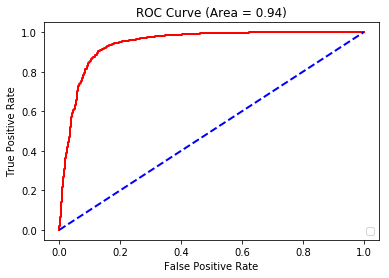

In [248]:
plot_ROC(rf_best, X_test)

In [249]:
worst_parameters = {'max_depth': [5], 'max_features': [2], 'min_samples_split': [2], 'n_estimators': [50]}
grid_search_worst = GridSearchCV(estimator = rf,
                           param_grid = worst_parameters,
                           scoring ='roc_auc',
                           n_jobs = -1)

grid_search_worst = grid_search_worst.fit(X_train, y_train)

In [250]:
evaluation(grid_search_worst.best_estimator_, X_train, X_test)

--- ROC AUC ---
Training Set: 0.9350315733704156
Test Set: 0.9263693038566004

--- Accuracy ---
Training Set: 0.87215
Test Set: 0.8675

--- Confusion Matrix ---
True Positive: 8661
False Negative: 0
True Negative: 14
False Positive: 1325

--- Precision ---
Training Set: 0.8720220220220221
Test Set: 0.8673142399359103

--- Recall ---
Training Set: 1.0
Test Set: 1.0

--- F1 Score ---
Training Set: 0.9316364997460097
Test Set: 0.9289429935110206


No handles with labels found to put in legend.


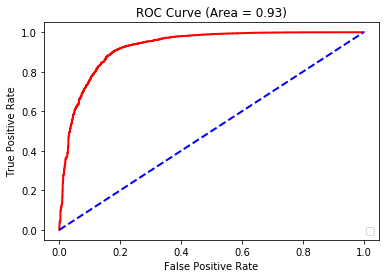

In [251]:
plot_ROC(grid_search_worst.best_estimator_, X_test)

# Random Search

In [252]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

# Specify parameters and distributions to sample from
parameters = {
    "max_features": randint(1, 9),
    "min_samples_split": range(2,10),
    "max_depth": range(2,10),
    "n_estimators" : [50,100]
}

# Run Grid Search
grid_search = RandomizedSearchCV(estimator = rf,
                           param_distributions = parameters,
                           scoring ='roc_auc',
                           n_iter = 15,
                           verbose = 2,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(grid_search.cv_results_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_depth=3, max_features=6, min_samples_split=6, n_estimators=100 
[CV] max_depth=3, max_features=6, min_samples_split=6, n_estimators=100 
[CV] max_depth=3, max_features=6, min_samples_split=6, n_estimators=100 
[CV] max_depth=8, max_features=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=8, max_features=4, min_samples_split=2, n_estimators=50, total=   4.4s
[CV] max_depth=8, max_features=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=6, n_estimators=100, total=   4.9s
[CV] max_depth=8, max_features=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=3, max_features=6, min_samples_split=6, n_estimators=100, total=   4.9s
[CV] max_depth=7, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  max_depth=3, max_features=6, min_samples_split=6, n_estimators=100, total=   5.1s
[CV] max_depth=7, max_features=8, min_samples_split=3, n_estimators=100 
[CV]  m

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.3s


[CV]  max_depth=6, max_features=1, min_samples_split=9, n_estimators=100, total=   2.9s
[CV] max_depth=6, max_features=1, min_samples_split=9, n_estimators=100 
[CV]  max_depth=6, max_features=1, min_samples_split=9, n_estimators=100, total=   2.3s
[CV] max_depth=6, max_features=1, min_samples_split=9, n_estimators=100 
[CV]  max_depth=6, max_features=1, min_samples_split=9, n_estimators=100, total=   2.8s
[CV] max_depth=2, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=2, max_features=4, min_samples_split=8, n_estimators=50, total=   1.6s
[CV] max_depth=2, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=2, max_features=4, min_samples_split=8, n_estimators=50, total=   1.5s
[CV] max_depth=2, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=9, max_features=8, min_samples_split=3, n_estimators=100, total=  16.3s
[CV] max_depth=8, max_features=1, min_samples_split=8, n_estimators=100 
[CV]  max_depth=9, max_features=8, min_

[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min finished


In [253]:
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.729908      0.002262         0.242606        0.108301   
1        4.638522      0.300173         0.135328        0.014461   
2       12.217293      0.085717         0.326720        0.083251   
3        7.593468      0.923657         0.338865        0.073058   
4        5.805600      0.147171         0.319280        0.082878   
5        2.401742      0.261695         0.165404        0.008980   
6        2.718263      0.535578         0.149540        0.017209   
7        3.682906      0.103038         0.119808        0.016863   
8        1.053177      0.056040         0.164748        0.098070   
9        5.155670      0.150628         0.155734        0.039862   
10       2.494558      0.351511         0.270422        0.068365   
11      16.074436      0.061718         0.283660        0.014139   
12       2.374553      0.293733         0.279664        0.028317   
13       1.406313      0.128495         0.074888        0.010856   
14       2.269359      0.133579         0.193054        0.018972   

   param_max_depth param_max_features param_min_samples_split  \
0                3                  6                       6   
1                8                  4                       2   
2                7                  8                       3   
3                6                  5                       4   
4                9                  2                       7   
5                2                  3                       2   
6                6                  3                       6   
7                5                  4                       3   
8                3                  1                       6   
9                5                  6                       6   
10               3                  2                       9   
11               9                  8                       3   
12               6                  1                       9   
13               2                  4                       8   
14               8                  1                       8   

   param_n_estimators                                             params  \
0                 100  {'max_depth': 3, 'max_features': 6, 'min_sampl...   
1                  50  {'max_depth': 8, 'max_features': 4, 'min_sampl...   
2                 100  {'max_depth': 7, 'max_features': 8, 'min_sampl...   
3                 100  {'max_depth': 6, 'max_features': 5, 'min_sampl...   
4                 100  {'max_depth': 9, 'max_features': 2, 'min_sampl...   
5                 100  {'max_depth': 2, 'max_features': 3, 'min_sampl...   
6                  50  {'max_depth': 6, 'max_features': 3, 'min_sampl...   
7                  50  {'max_depth': 5, 'max_features': 4, 'min_sampl...   
8                  50  {'max_depth': 3, 'max_features': 1, 'min_sampl...   
9                  50  {'max_depth': 5, 'max_features': 6, 'min_sampl...   
10                100  {'max_depth': 3, 'max_features': 2, 'min_sampl...   
11                100  {'max_depth': 9, 'max_features': 8, 'min_sampl...   
12                100  {'max_depth': 6, 'max_features': 1, 'min_sampl...   
13                 50  {'max_depth': 2, 'max_features': 4, 'min_sampl...   
14                100  {'max_depth': 8, 'max_features': 1, 'min_sampl...   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.923842           0.931137           0.922557         0.925845   
1            0.947195           0.954620           0.951953         0.951256   
2            0.957371           0.962244           0.959759         0.959791   
3            0.950144           0.953325           0.948071         0.950513   
4            0.943618           0.944998           0.943187         0.943935   
5            0.903238           0.909664           0.897640         0.903514   
6            0.938205           0.941513           0.935472         0.938397   
7            0.93

In [254]:
rf_best = grid_search.best_estimator_
print(grid_search.best_score_)
print(grid_search.best_params_)

rf_worst = grid_search.cv_results_['params'][1]
print(rf_worst)

0.9662825980884562
{'max_depth': 9, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 100}
{'max_depth': 8, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [255]:
evaluation(rf_best, X_train, X_test)

--- ROC AUC ---
Training Set: 0.985384073982288
Test Set: 0.9643337774969023

--- Accuracy ---
Training Set: 0.970425
Test Set: 0.9611

--- Confusion Matrix ---
True Positive: 8638
False Negative: 23
True Negative: 973
False Positive: 366

--- Precision ---
Training Set: 0.9676325952268496
Test Set: 0.9593513993780542

--- Recall ---
Training Set: 0.9994834414279975
Test Set: 0.9973444175037525

--- F1 Score ---
Training Set: 0.9833001595166505
Test Set: 0.9779790546277951


No handles with labels found to put in legend.


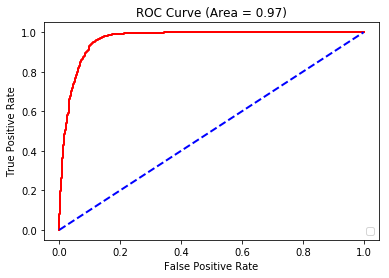

In [211]:
plot_ROC(rf_best, X_test)

# Cross Validation

In [256]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

# Specify parameters and distributions to sample from
parameters = {
    "max_features": [2,4],
    "min_samples_split": [2,5],
    "max_depth": [5],
    "n_estimators" : [50]
}

# Run Grid Search
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring ='roc_auc',
                           cv = 5,
                           verbose = 2,
                           n_jobs = 1)

grid_search = grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(grid_search.cv_results_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=50, total=   1.3s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=50, total=   1.1s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=50, total=   0.9s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=50, total=   0.9s
[CV] max_depth=5, max_features=2, min_samples_split=2, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=2, n_estimators=50, total=   1.4s
[CV] max_depth=5, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=5, n_estimators=50, total=   0.9s
[CV] max_depth=5, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples_split=5, n_estimators=50, total=   1.1s
[CV] max_depth=5, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  max_depth=5, max_features=2, min_samples

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   26.1s finished


In [257]:
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.062646      0.174587         0.062577        0.029197   
1       0.862528      0.090984         0.043141        0.012733   
2       1.294942      0.017505         0.032229        0.001598   
3       1.288524      0.021817         0.034398        0.001897   

  param_max_depth param_max_features param_min_samples_split  \
0               5                  2                       2   
1               5                  2                       5   
2               5                  4                       2   
3               5                  4                       5   

  param_n_estimators                                             params  \
0                 50  {'max_depth': 5, 'max_features': 2, 'min_sampl...   
1                 50  {'max_depth': 5, 'max_features': 2, 'min_sampl...   
2                 50  {'max_depth': 5, 'max_features': 4, 'min_sampl...   
3                 50  {'max_depth': 5, 'max_features': 4, 'min_sampl...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.935373  ...         0.926105        0.004948                3   
1           0.933949  ...         0.925398        0.004699                4   
2           0.936725  ...         0.937205        0.001624                2   
3           0.937579  ...         0.937420        0.001835                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.940551            0.932089            0.930842   
1            0.938682            0.932220            0.931501   
2            0.941920            0.946057            0.941804   
3            0.942306            0.946429            0.942169   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.937712            0.931109          0.934461         0.003940  
1            0.937048            0.930022          0.933895         0.003358  
2            0.945661            0.940687          0.943226         0.002196  
3            0.944545            0.941194          0.943329         0.001899  

[4 rows x 24 columns]